In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
from scipy import stats
import itertools

In [2]:
train_ts = pd.read_csv("../data/input/training_set.csv")
display(train_ts.head())

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [60]:
train_meta = pd.read_csv("../data/input/training_set_metadata.csv")
display(train_meta.head())

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


### Δt-Δm分布の作成

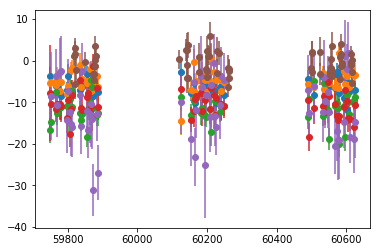

In [81]:
object_id = 282647
sample_data = train_ts.query('object_id == @object_id')

for passband in sample_data.passband.unique():
    extract_pb = sample_data.query('passband == @passband')
    plt.errorbar(extract_pb.mjd, extract_pb.flux, extract_pb.flux_err, fmt='o')

/home/hakubishin3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


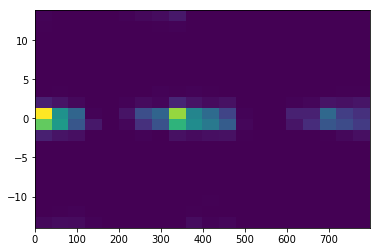

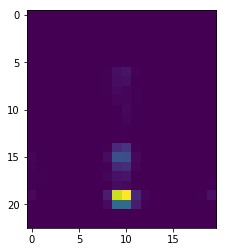

CPU times: user 1.68 s, sys: 7.97 ms, total: 1.68 s
Wall time: 1.67 s


In [113]:
%%time
def calc_delta(extract_pb):
    eps = 1e-5
    extract_pb["flux"] += 0 - min(extract_pb["flux"]) + eps  # normalize
    comb = list(itertools.combinations(extract_pb.index, 2))
    results = []
    for idx1, idx2 in comb:
        flux1 = extract_pb.loc[idx1]['flux']
        flux2 = extract_pb.loc[idx2]['flux']
        mjd1 = extract_pb.loc[idx1]['mjd']
        mjd2 = extract_pb.loc[idx2]['mjd']
        delta_t = mjd1 - mjd2
        delta_m = np.log(flux1) - np.log(flux2)
        if delta_t < 0:
            delta_t *= -1
            delta_m *= -1
        results.append((delta_m, delta_t))
    return pd.DataFrame(results, columns=['delta_m', 'delta_t'])

result_df = calc_delta(extract_pb)

t_bins = np.array([1/145,2/145,3/145,4/145,1/25,2/25,3/25,1.5,2.5,3.5,\
                    4.5,5.5,7,10,20,30,60,90,120,240,600,960,2000,4000])
h, xedges, yedges = np.histogram2d(result_df.delta_t, result_df.delta_m, bins=(t_bins, 20))
plt.hist2d(result_df.delta_t, result_df.delta_m, bins=(20, 20))
plt.show()

#extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(h)
plt.show()

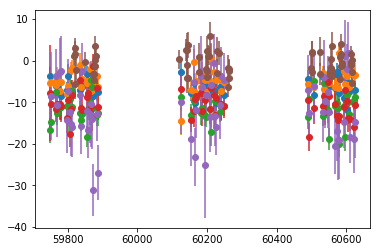

/home/hakubishin3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


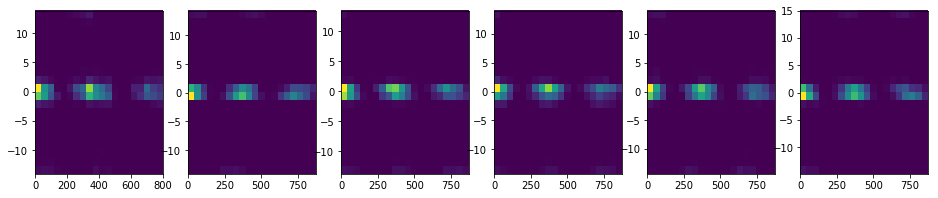

In [114]:
object_id = 282647
sample_data = train_ts.query('object_id == @object_id')

for passband in sample_data.passband.unique():
    extract_pb = sample_data.query('passband == @passband')
    plt.errorbar(extract_pb.mjd, extract_pb.flux, extract_pb.flux_err, fmt='o')
plt.show()

fig, axes = plt.subplots(ncols=6, figsize=(16, 3))
for passband in sample_data.passband.unique():
    extract_pb = sample_data.query('passband == @passband')
    result_df = calc_delta(extract_pb)
    axes[passband].hist2d(result_df.delta_t, result_df.delta_m, bins=(20, 20))
plt.show()

6 18556


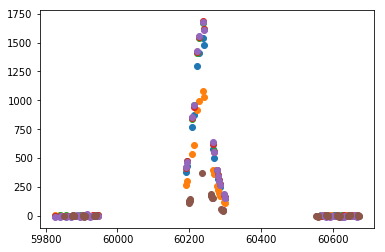

/home/hakubishin3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


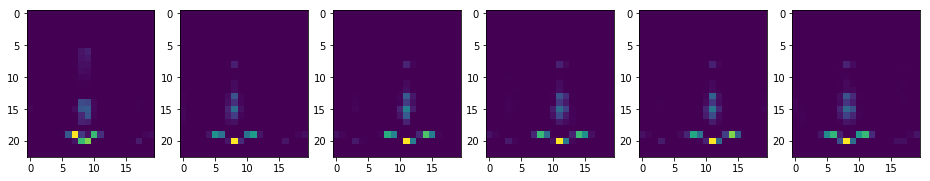

6 77157


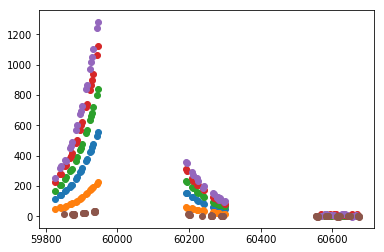

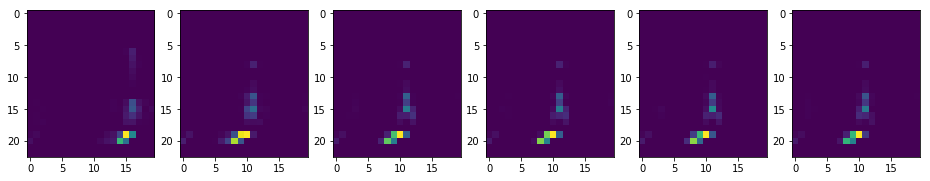

6 83348


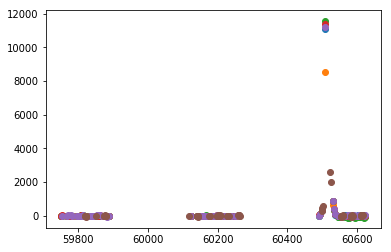

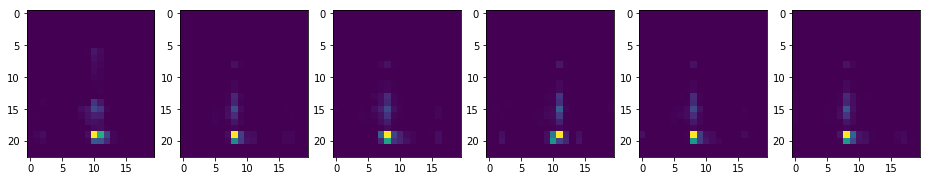

15 4173


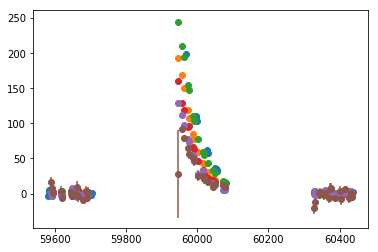

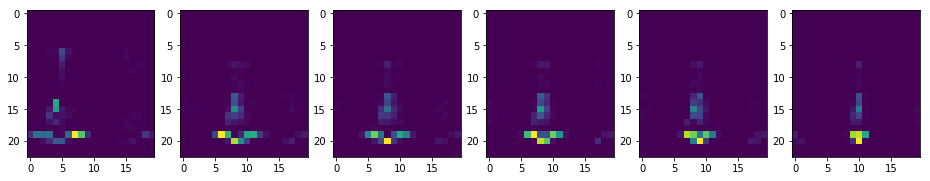

15 23116


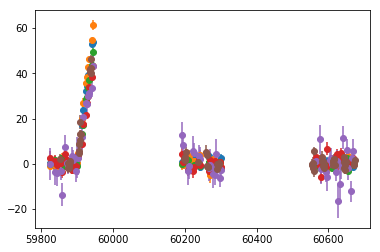

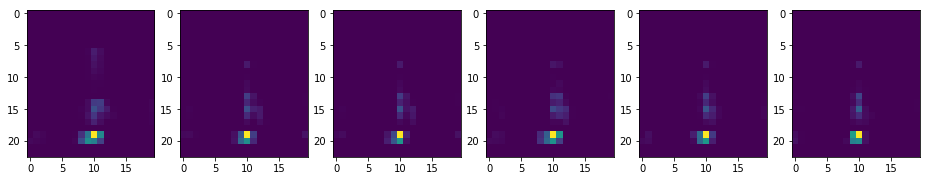

15 97406


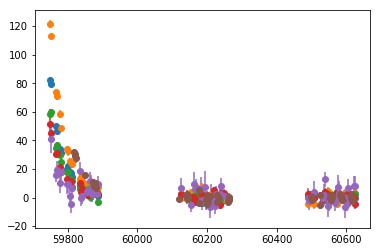

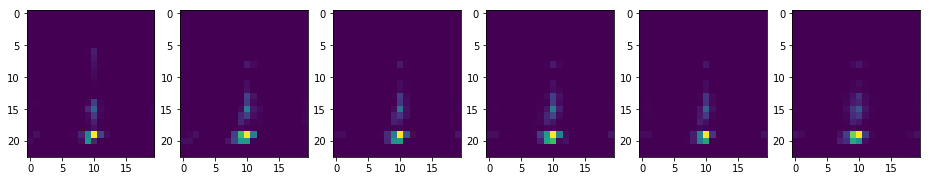

16 2677


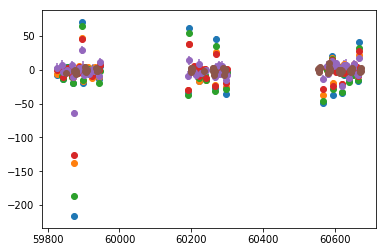

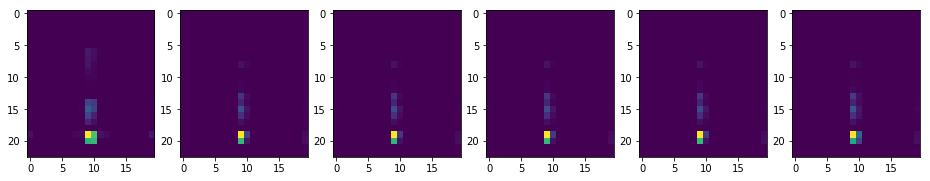

16 4171


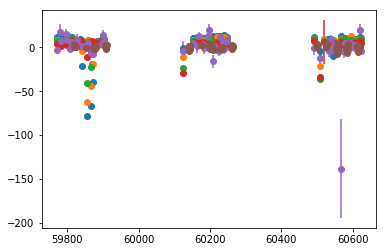

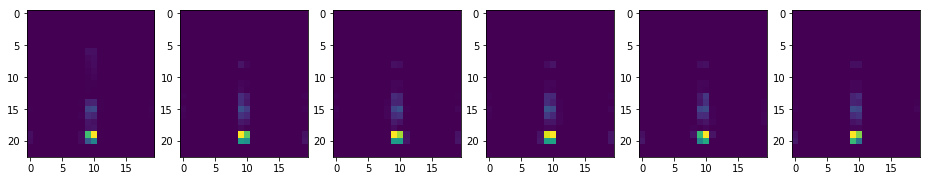

16 7566


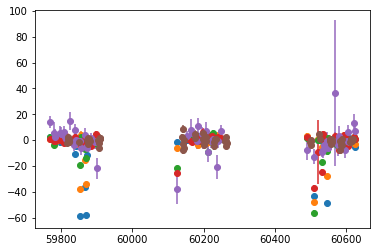

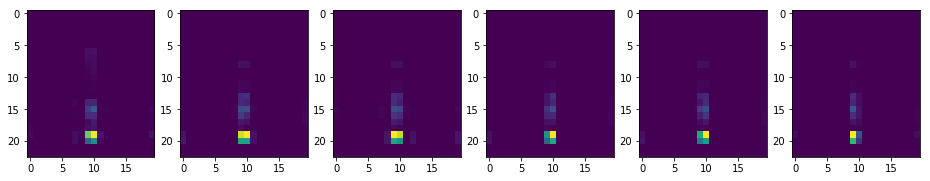

42 730


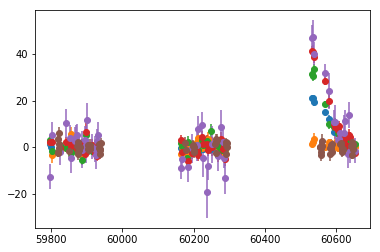

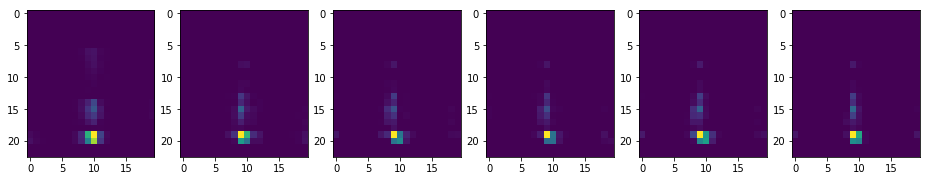

42 1632


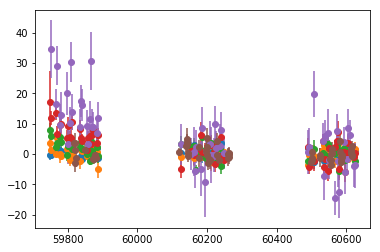

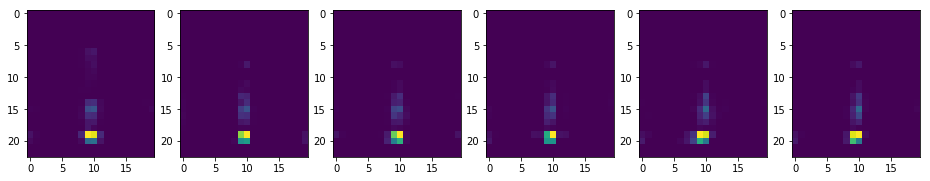

42 2103


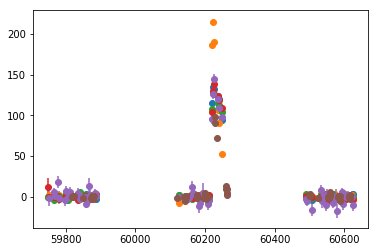

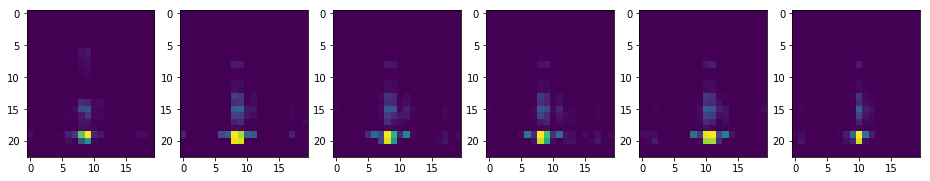

52 10757


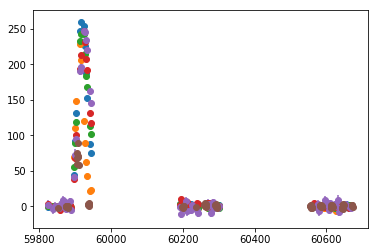

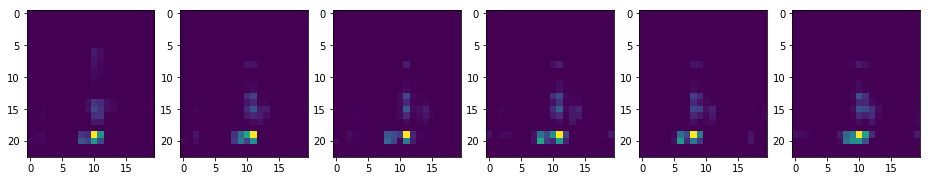

52 11773


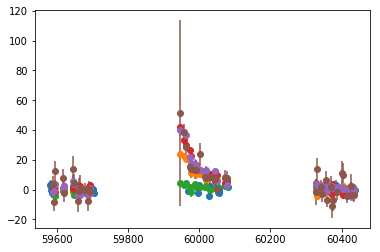

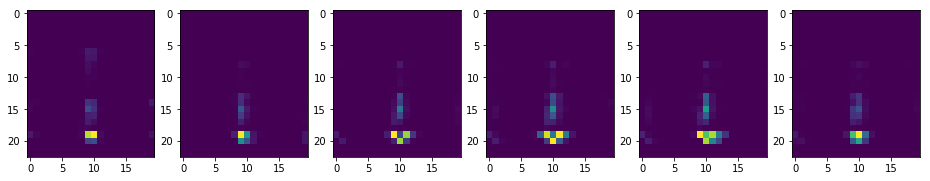

52 13138


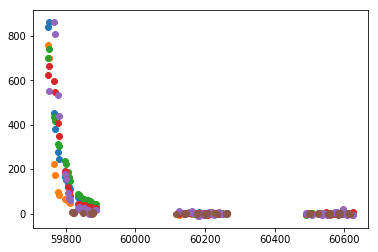

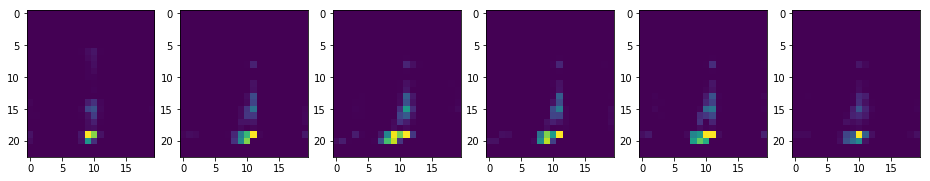

53 133773


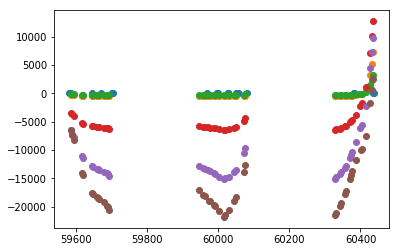

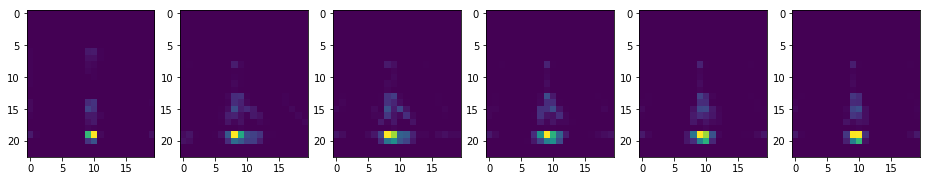

53 268977


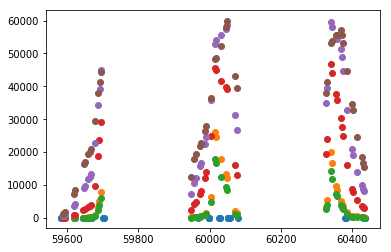

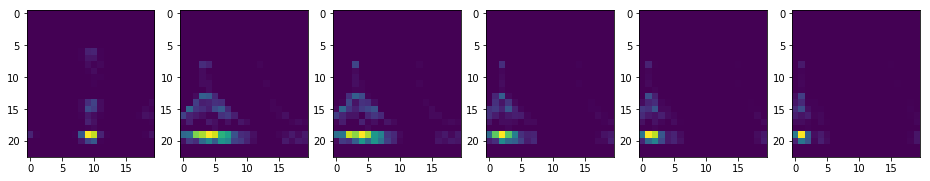

53 278480


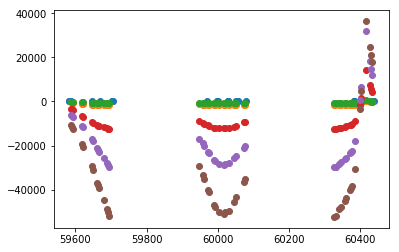

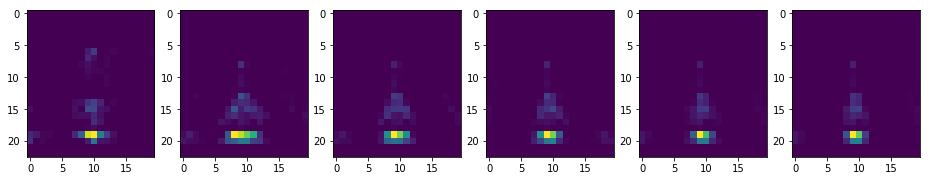

62 3910


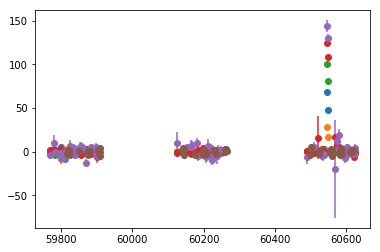

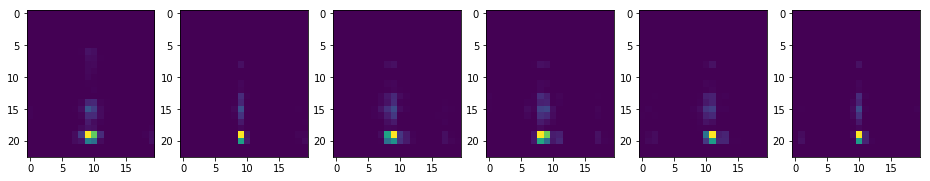

62 7703


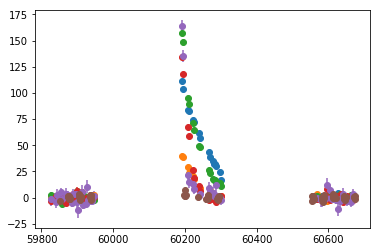

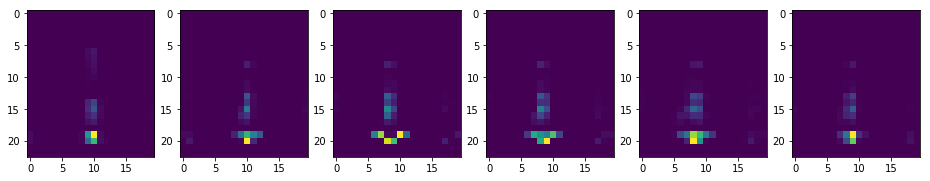

62 11770


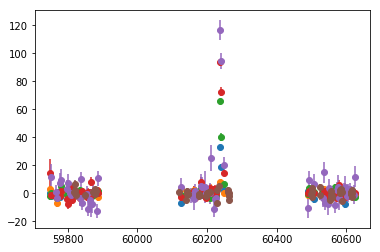

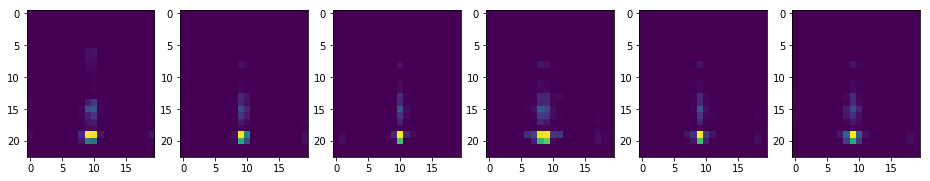

64 62187


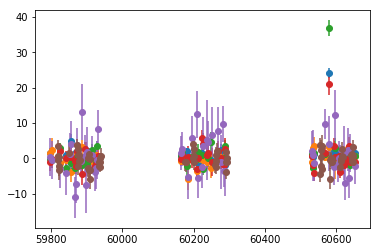

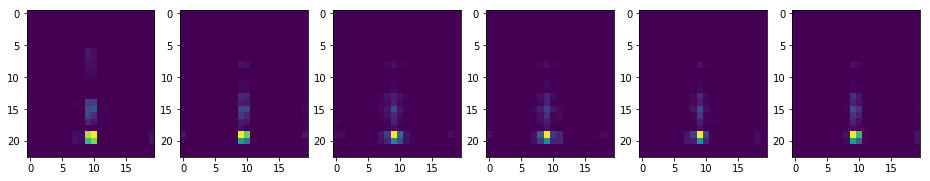

64 139362


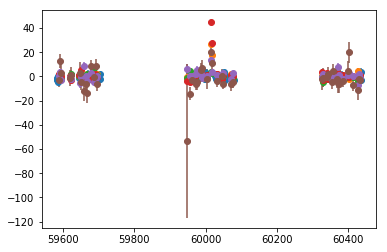

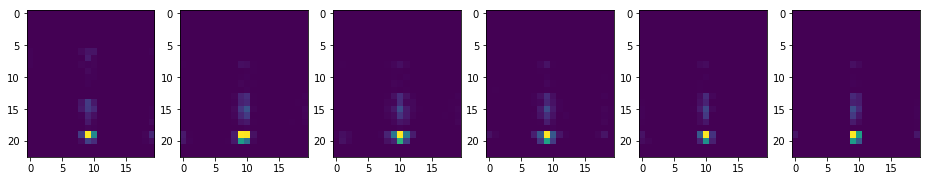

64 1573501


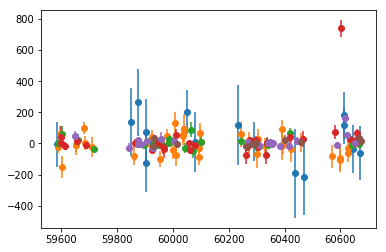

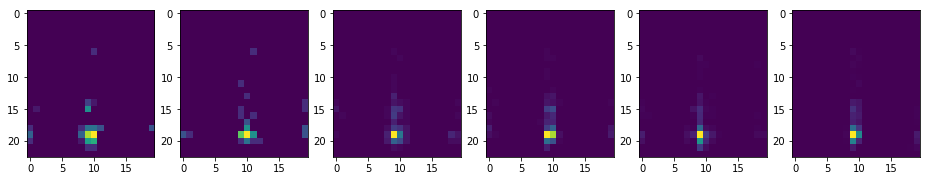

65 1227


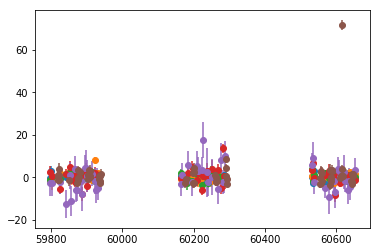

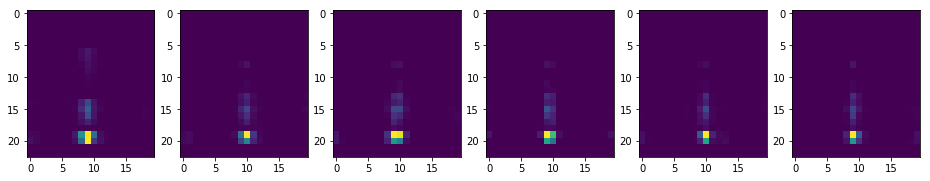

65 1926


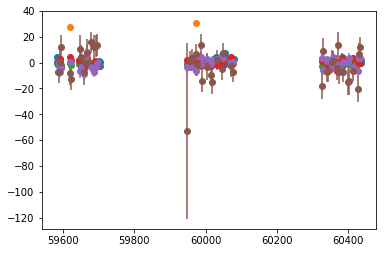

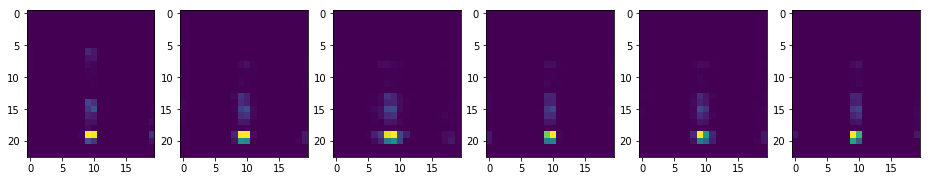

65 2624


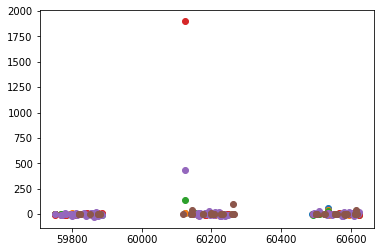

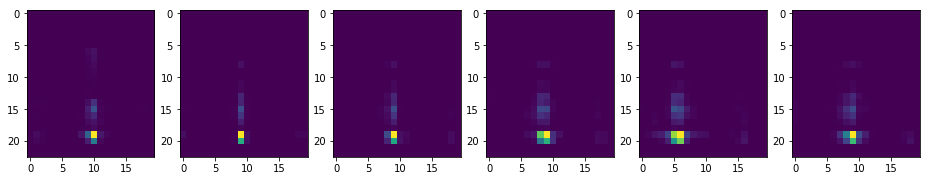

67 2922


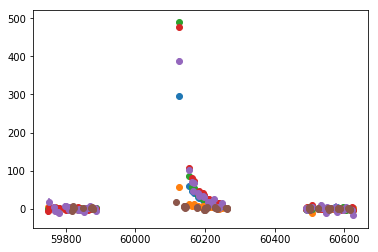

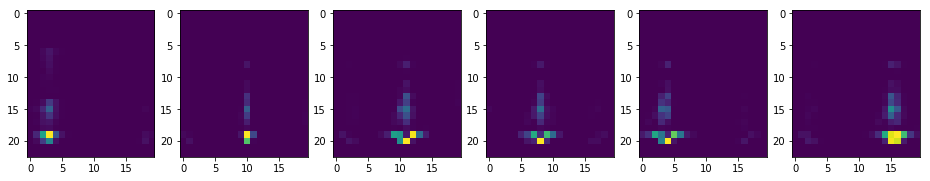

67 3041


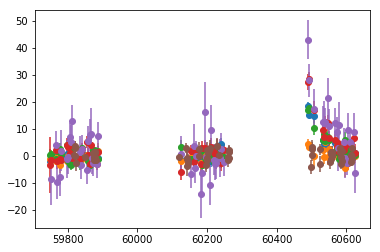

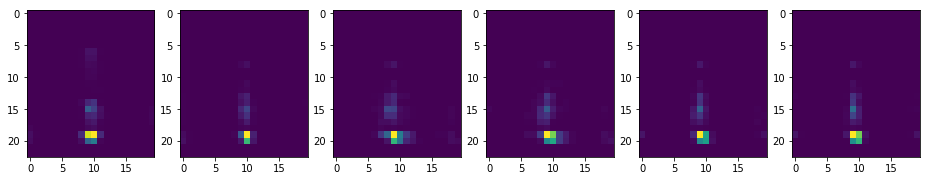

67 19154


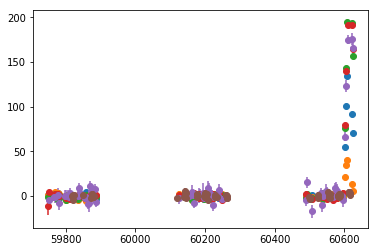

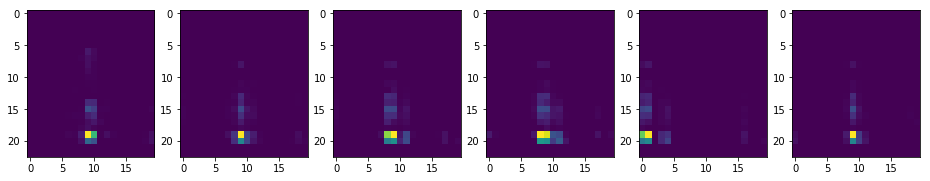

88 713


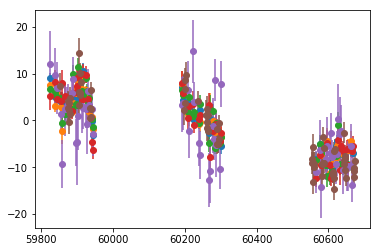

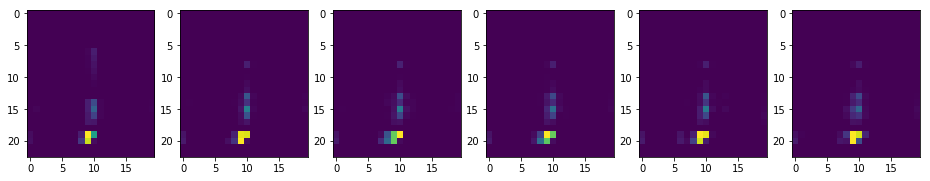

88 3489


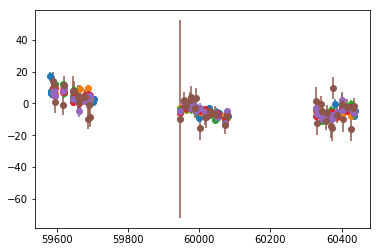

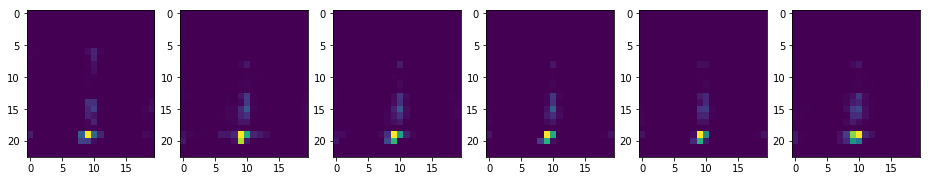

88 4088


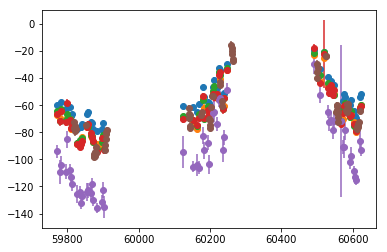

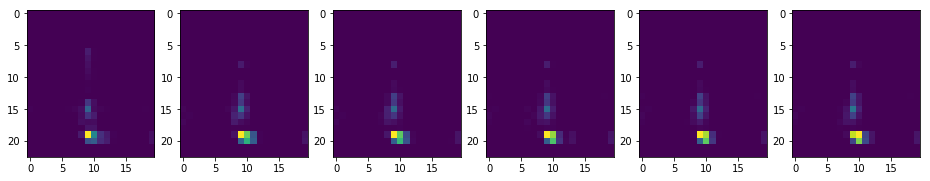

90 745


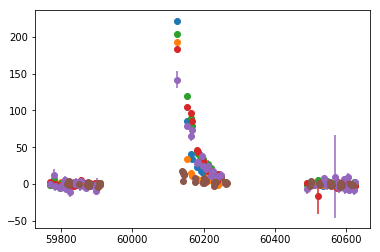

KeyboardInterrupt: 

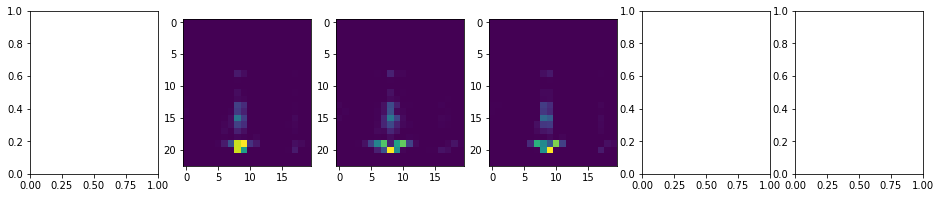

In [120]:
for target in np.sort(train_meta.target.unique()):
    objects = train_meta.query('target==@target').object_id.head(3).values
    for obj in objects:
        print(target, obj)
        extract_obj = train_ts.query('object_id==@obj')

        for passband in extract_obj.passband.unique():
            extract_pb = extract_obj.query('passband == @passband')
            plt.errorbar(extract_pb.mjd, extract_pb.flux, extract_pb.flux_err, fmt='o')
        plt.show()

        fig, axes = plt.subplots(ncols=6, figsize=(16, 3))
        for passband in extract_obj.passband.unique():
            extract_pb = extract_obj.query('passband == @passband')
            result_df = calc_delta(extract_pb)

            t_bins = np.array([1/145,2/145,3/145,4/145,1/25,2/25,3/25,1.5,2.5,3.5,\
                                4.5,5.5,7,10,20,30,60,90,120,240,600,960,2000,4000])
            h, xedges, yedges = np.histogram2d(result_df.delta_t, result_df.delta_m, bins=(t_bins, 20))
            axes[passband].imshow(h)
        plt.show()